Kritische Entfernung 2.78m 
Überholentfernung: 17.05m 
Kritischer Winkel: 11.21° 



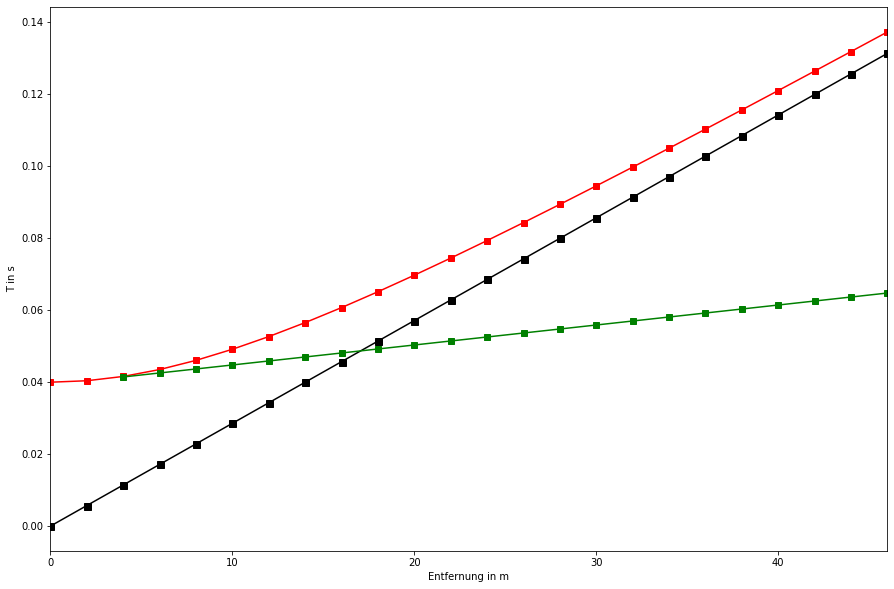

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define Model

z = np.array([0,7]) # Tiefe in m
v = np.array([350,1800]) # Geschwindigkeit in [m/s]

# Anzahl Empfänger
rec_num=24
# Empfängerabstand in m
dx=2

# Ab hier nichts mehr verändern

## Compute Traveltimes

if v[0] > v[1]:
    alpha_krit=0
    x_crit=0
    r_crit=0
    x_ue=0

else:
    alpha_krit = np.arcsin(v[0]/v[1])*180/np.pi
    x_crit = np.tan(np.deg2rad(alpha_krit))*z[1]
    r_crit = np.sqrt((x_crit**2) + z[1]**2)
    x_ue = 2*z[1]*np.sqrt((v[0]+v[1])/(v[1]-v[0]))
x_max=(rec_num-1)*dx
inc=np.intc(x_max/dx)+1   
x_vec = np.linspace(0,x_max,inc)
direct = np.zeros(len(x_vec))
reflect = np.zeros(len(x_vec))
refrac = np.zeros(len(x_vec))*np.NaN
for idx,x in enumerate(x_vec):
    direct[idx] = x/v[0]
    reflect[idx] = 2*np.sqrt((x/2)**2 + z[1]**2)/v[0]
    if x > x_crit*2:
        refrac[idx] = 2*r_crit/v[0] + (x-2*x_crit)/v[1]   

plt.figure(figsize=(15,10))
plt.plot(x_vec,direct,'ks-',Markersize = 7)#,label='Direkte Welle')
plt.plot(x_vec,reflect,'rs-')#,label='Reflektierte Welle')
if v[0] < v[1]:
    plt.plot(x_vec,refrac,'gs-')#,label='kritisch-refraktierte Welle')
#    plt.axvline(2*x_crit,Color='y',linestyle = '--',)#label='kritische Entfernung')
#    plt.axvline(x_ue,Color='b',linestyle = '--')#,label='Überholentfernung')
    print('Kritische Entfernung %.2fm \nÜberholentfernung: %.2fm \nKritischer Winkel: %.2f° \n'%(2*x_crit,x_ue,alpha_krit))
#plt.legend()
plt.xlim([0,x_max])
#plt.gca().invert_yaxis()
plt.ylabel('T in s')
plt.xlabel('Entfernung in m')
plt.show()